# Earthquake Lab

IMPORTANT!

PLEASE NOTE: This notebook is running remotely, and will time out after ~30 minutes of inactivity and your work will be lost. When you finish this lab, or want to take a break DOWNLOAD THIS FILE SO THAT YOUR WORK IS SAVED. 

Download as follows:

Under the File menu in the upper left select 'Download as', and then 'Notebook (.ipybn)'. Your file will download to your computer. A new browser window may open, which is fine (you can close it). 

## Lab introduction

In this lab we will both gain some experience programming in Python, and explore interesting patterns of seismicity in the central part of New Mexico (where we will be next week!). 



## Becoming familiar with Python

Programming is a way to speak with your computer, and Python is a programming "language" that is used by a huge number of scientists, engineers, and designers today. 

Here are some things to know:

1) Within this Notebook you can "run" each cell by typing Shift + Enter.

2) When a cell is running a * will appear to the left of the cell in place of the number within brackets. Some cells take a moment to run. If you see the *, hold tight. 





We will start by becoming familiar with some simple programming commands.


Try placing your cursor in the cell below and typing Shift + Enter.

In [12]:
print('This cell just ran correctly!')

This cell just ran correctly!


Now Shift + Enter to run the cell below (don't modify anything!). This sets up some code we will use later in this lab. 

In [1]:
## DO NOT MODIFY ##
# Import libraries for use later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import csv
import datetime
from mpl_toolkits.basemap import Basemap
import urllib.request as urllib2
from scipy.stats import gaussian_kde
import pandas

/srv/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In Python, letters surrounded by 'quotes' are recognized as words. If you leave off the quotes the computer will assume the letters represent a variable, i.e., a = 6, or dog = 7. 

Anything that comes after the # symbol is a comment, i.e., it is not run as code, it's just a note to yourself. Feel free to add your own comments to the code throughout this lab!

Now enter your names in the cell below.  

In [4]:
#Fill in your names here. Make sure names are surrounded by single quote marks, like 'so'
P1 = 'Kira' # Person 1
P2 = 'Tianran' # Person 2


print('This lab is being completed by %s and %s' %(P1,P2))

This lab is being completed by Kira and Tianran


In the cell above you asigned words to the variables P1 and P2, then in the print statement you didn't have to type out the names, you could just reference the variables.

Variables can be assigned to lists by using square brackets: [  ] 

Run the cell below.

In [5]:
people = [P1,P2]

print(people)

rocks = ['shale','sandstone','limestone']

print(rocks)

['Kira', 'Tianran']
['shale', 'sandstone', 'limestone']


Try one more example:

In [6]:
nouns = ['cats','schist','quesadillas','quartz crystals']
numbers = [3,11,91, 4000]

print('%s is most excited about the part of this lab where we learn about %s %s.' 
      %(random.choice(people),random.choice(numbers),random.choice(nouns)))

Tianran is most excited about the part of this lab where we learn about 3 quesadillas.


Run the cell above another time and you should get a different sentence. 

Now we will move on to the lab. Much of the code is already written for you, but you will have a chance to write some of your own at the end. 

## Part 1) Import earthquake data and make a map
Shift + Enter to run this cell

In [34]:
#Import earthquake data
eq_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/nm_eqs.txt" #location of text file
response = urllib2.urlopen(eq_url)
data = np.loadtxt(response, delimiter= '\t') # Load in this text file, columns are seperated by tabs


# Pull out each variable
date = [int(row[0]) for row in data] # date is in format yyyymmdd
lat = [float(row[1]) for row in data]
lon = [row[2] for row in data]
depth = [row[3] for row in data]
mag = [row[4] for row in data]

In [ ]:
# Look at data set
data2 = pandas.DataFrame(data = data, columns = ('Date','lat','lon','depth','mag'))
print(data2)


## Import geographic data to draw map
Shift + Enter to run the cell

In [28]:
# Run this cell to import the topography of NM and set up the map
topo_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/etopo1_bedrock.txt"
response = urllib2.urlopen(topo_url)

# Read header (number of columns and rows, cell-size, and lower left coordinates)
ncols = int(response.readline().split()[1])
nrows = int(response.readline().split()[1])
xllcorner = float(response.readline().split()[1])
yllcorner = float(response.readline().split()[1])
cellsize = float(response.readline().split()[1])

# Read in topography as a whole, disregarding first five rows (header)
etopo = np.loadtxt(response, skiprows = 0)

# Data resolution is quite high. I decrease the data resolution 
# to decrease the size of the final figure
dres = 2

# Swap the rows
etopo[:nrows+1, :] = etopo[nrows+1::-1, :]
etopo = etopo[::dres, ::dres]

# Create longitude and latitude vectors for etopo
lons = np.arange(xllcorner, xllcorner+cellsize*ncols, cellsize)[::dres]
lats = np.arange(yllcorner, yllcorner+cellsize*nrows, cellsize)[::dres]

## Draw a map of New Mexico

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))

#not using these two lines of code
# mapfig, myAx = plt.subplots()
# myAx.plot([1,2,3])


m = Basemap(llcrnrlon=-110.,llcrnrlat=31.,urcrnrlon=-102.,urcrnrlat=37.5,\
            resolution='l',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20.)

# Convert etopo1 coordinates lon/lat in ° to x/y in m
# (From the basemap help: Calling a Basemap class instance with the arguments
# lon, lat will convert lon/lat (in degrees) to x/y map projection coordinates
# (in meters).)
rlons, rlats = m(*np.meshgrid(lons,lats))

# Draw etopo1, first for land and then for the ocean, with different colormaps
llevels = np.arange(-100,4100,100) # check etopo.ravel().max()
lcs = m.contourf(rlons, rlats, etopo, llevels, cmap=plt.cm.terrain)
olevels = np.arange(-3500,1,100) # check etopo.ravel().min()
cso = m.contourf(rlons, rlats, etopo, olevels, cmap=plt.cm.ocean)

# #m.shadedrelief()
m.drawparallels(np.arange(30,40,2),labels=[1,0,0,0], color = 'grey')
m.drawmeridians(np.arange(-110,-102,2),labels=[0,0,0,1], color = 'grey')
m.drawstates(color = 'black', linewidth = 2)
m.drawcountries(color='black', linewidth = 2)

# Add scale to map
m.drawmapscale(-103, 31.5, -106, 32, 100, barstyle='simple', units='km', fontsize=9, yoffset=None, labelstyle='simple', fontcolor='k', fillcolor1='w', fillcolor2='k',format='%d')

%config InlineBackend.close_figures=False # keep figures open in pyplot

## Plot earthquakes in NM on the map

In [ ]:
m.scatter(lon,lat, latlon = True, s = 45, edgecolor = 'black', facecolor = 'blue')


## Describe any patterns in the seismicity

Where are there notable concentrations? Absences? Is there any relationship with topography?

**Introduce SSA, add text here

## Now plot the outline of the Socorro Seismic Anomaly

In [ ]:
# Import the coordinates of the Socorro Seismic Anomaly
ssa_url = "https://raw.githubusercontent.com/kgo2105/Earthquake_lab/master/socorro_outline.txt"
response = urllib2.urlopen(ssa_url)
ssa = np.loadtxt(response, delimiter= ',')

# Coordinates of the Socorro Seismic Anomaly outline
ssa_lat = [row[1] for row in ssa]
ssa_lon = [row[0] for row in ssa]

# Plot 
m.plot(ssa_lon,ssa_lat, latlon=True, color = 'r', linewidth = 1.5)

There are so many earthquakes plotted on the map above that it is hard to see if there is a point in the blob of events with an especially high concentration. 

You can add a colorscale so that the region with the most earthquakes stacked on top of each other stands out. Run the cell below. 

In [ ]:
xy = np.vstack([lon,lat])
z = gaussian_kde(xy)(xy)

m.scatter(lon, lat, c = z,latlon = True, s = 45, edgecolor = 'black')
m.plot(ssa_lon,ssa_lat, latlon=True, color = 'r', linewidth = 1.5)

Text prompt about describing patterns...

# Part 2) Investigate earthquake data

## Plot the earthquakes by depth

(20, 0)

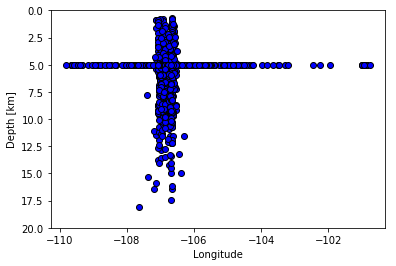

In [36]:
plt.figure()
plt.scatter(lon,depth, color = 'blue', edgecolor = 'black')
plt.xlabel('Longitude')
plt.ylabel('Depth [km]')
plt.ylim(20,0)

# ** Make point about data quality check


Text here. Depths of 5km are not accurate, 5km is just put in when depth is unknown

Omit depths = 5 km and replot


Text(0.5,0,'Longitude')

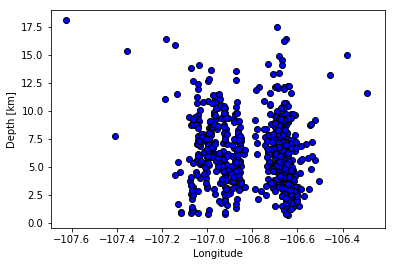

In [37]:
plt.figure()
for i in data:
    if i[3] != 5.0: #does not equal
        plt.scatter(i[2],i[3], color = 'blue', edgecolor = 'black')
plt.ylabel('Depth [km]')
plt.xlabel('Longitude')

# Plot by date

Text(0.5,0,'Year')

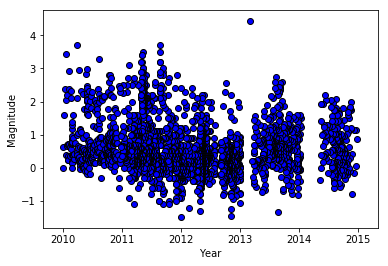

In [47]:
# Format dates
ymd = []
for i in range(len(date)):
    ymd.append(datetime.datetime.strptime(str(date[i]),'%Y%m%d'))

# plot of magnitude
plt.figure()
plt.scatter(ymd,mag, edgecolor = 'black',color = 'blue')
plt.ylabel('Magnitude')
plt.xlabel('Year')

 Have students plot some new kind of scatter plot and change colors, etc.

In [69]:
date2 = []
for i in ymd:
    date2.append((i - min(ymd)).total_seconds())

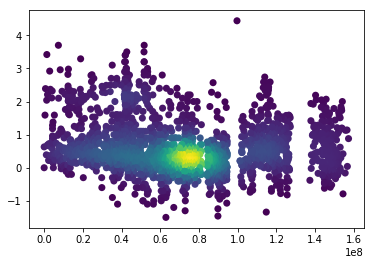

In [75]:
# calculate point density
plt.figure()
xy = np.vstack([date2,mag])
z = gaussian_kde(xy)(xy)
plt.scatter(date2,mag, c = z, s = 50, edgecolor = '', zorder = 200)

More TBD....